In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv(r"C:\Users\TIBU\Downloads\CodvedaProject\2) Stock Prices Data Set.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
df #Display dataframe

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...
2017-12-29,XYL,68.5300,68.8000,67.9200,68.2000,1046677
2017-12-29,YUM,82.6400,82.7100,81.5900,81.6100,1347613
2017-12-29,ZBH,121.7500,121.9500,120.6200,120.6700,1023624


In [3]:
df = df.sort_values(by=['symbol', 'date'])

In [4]:
df['future_close'] = df.groupby('symbol')['close'].shift(-1)

In [5]:
df['target'] = (df['future_close'] > df['close']).astype(int)

In [6]:
df = df.dropna()

In [7]:
X = df[['open', 'high', 'low', 'close', 'volume']]

In [8]:
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Logistic Regression
Accuracy: 0.5161582421120412
              precision    recall  f1-score   support

           0       0.36      0.00      0.00     48073
           1       0.52      1.00      0.68     51319

    accuracy                           0.52     99392
   macro avg       0.44      0.50      0.34     99392
weighted avg       0.44      0.52      0.35     99392



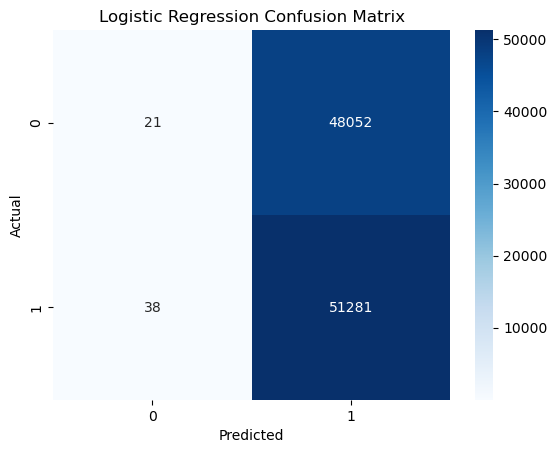


Decision Tree
Accuracy: 0.5019216838377334
              precision    recall  f1-score   support

           0       0.49      0.48      0.48     48073
           1       0.52      0.52      0.52     51319

    accuracy                           0.50     99392
   macro avg       0.50      0.50      0.50     99392
weighted avg       0.50      0.50      0.50     99392



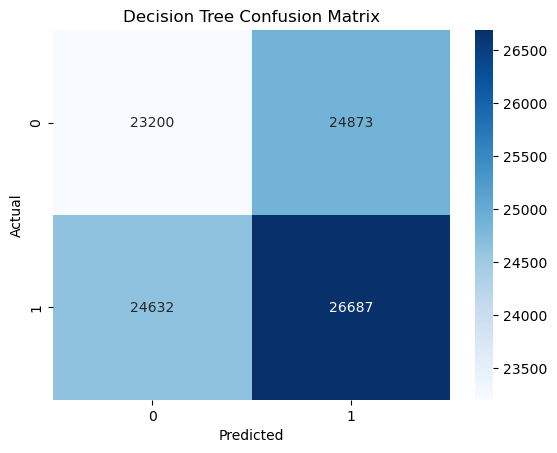


Random Forest
Accuracy: 0.5003018351577592
              precision    recall  f1-score   support

           0       0.48      0.45      0.47     48073
           1       0.52      0.54      0.53     51319

    accuracy                           0.50     99392
   macro avg       0.50      0.50      0.50     99392
weighted avg       0.50      0.50      0.50     99392



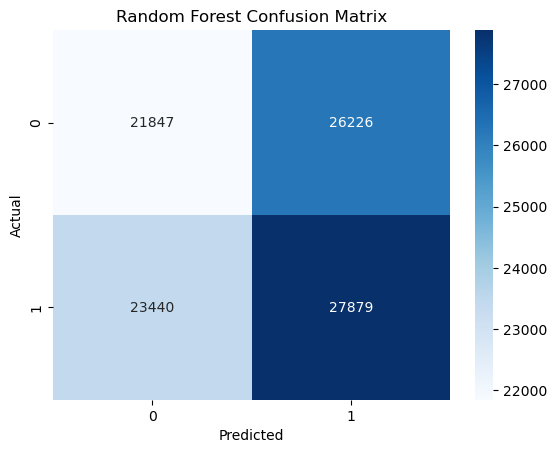

In [14]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)